# GitLab exercise

The final part of the workshop focuses on implementing a software package for calculating different distance measures. The exercise uses the git repository server 
at GWDG "GitLab". 

This part of the workshop covers:

- Creating GitLab repositories
- Adding a Open Source License
- Packaging and testing software
- Package documentation
- Creating merge requests
- Continuous integration (automated building and testing).

Here we use gitlab since it does not require any additional registration procedure. For the sake of completeness, here is a (non-comprehensive) list of alternative git hosting services:

- github (https://github.com): probably the best know git service, free of charge for public repositories
- bitbucket (https://bitbucket.com): From the Atlassian family, let's you have a limited number of private repositories for free.
- gitlab (https://gitlab.com): Github's main contender. Easy to deploy as institutional service. 


Here, we use the gitlab installation at GWDG. Everybody with a `*.mpg.*` email address automatically also has a gitlab account at GWDG. You can create as many public, private, or internal repositories as you like. Advanced features like Continuous Integration are part of the service, no Third Parties involved.

There is also a gitlab instance at MPI EvolBio, but the version is a bit outdated and it is missing many of the features that we will use in the workshop.

## Exercise: Log into GitLab

Navigate to https://gitlab.gwdg.de and log in with your institutional email address and password.

# Add a ssh key to your gitlab profile
The folks at GWDG are a bit crazy about security. Therefore, you can only push (upload commits) after configuring your account for *passwordless* authentication using ssh keys.

### Create ssh keypair.
**Watch out: Do not overwrite your existing ssh keys** If you already have a ssh keypair on your local computer, skip this step. Otherwise, follow these instructions:

* Run the following command in a shell (git shell on windows)
```shell
$ ssh-keygen
```
Simply accept all default settings by pressing [Enter] on each prompt. For simplicity, do not enter a key passphrase.

### Upload public key to gitlab.
**This step is mandatory unless your public key is already uploaded to gitlab.**

First paste your public key to the command line:
```shell
$ cat ~/.ssh/id_rsa.pub
```

Then use your mouse to select the entire public key string. Depending on your operating system, you can use the key combination "Ctrl+C" or "Ctrl+Shift+C" to copy the selected key into the clipboard. Make sure to select the entire key, it start with `ssh-rsa` and ends with your username and hostname of your computer. E.g., here is the begin and end of my public key:

```
ssh-rsa AAAA...inxol6NQ== grotec@micropop037
```
**NOTE** Disclosing *public* ssh keys is no security issue. But **NEVER EVER** disclose your *private* key. It's in the same directory and has the same filename but no extension.

Now navigate to your gitlab profile by clicking on your avatar icon in the top right corner of your gitlab page. Then select `Settings`.

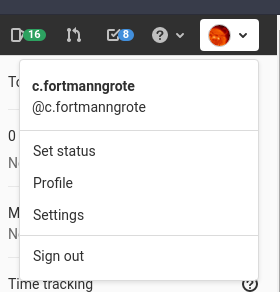

On your profile setting page, go to `SSH Keys` in the left navigation panel, paste your public ssh key into the text box (using "Ctrl+V" or mouse right-click and "Paste"). Click `Add key` to submit the new key.


# Create a repository (aka Project)

A software repository, or “repo” for short, is a storage location for software packages. A repository is managed through a version control system. Here, we use git.

To create a repository on gitlab click on "New" located at the left side of the home page.

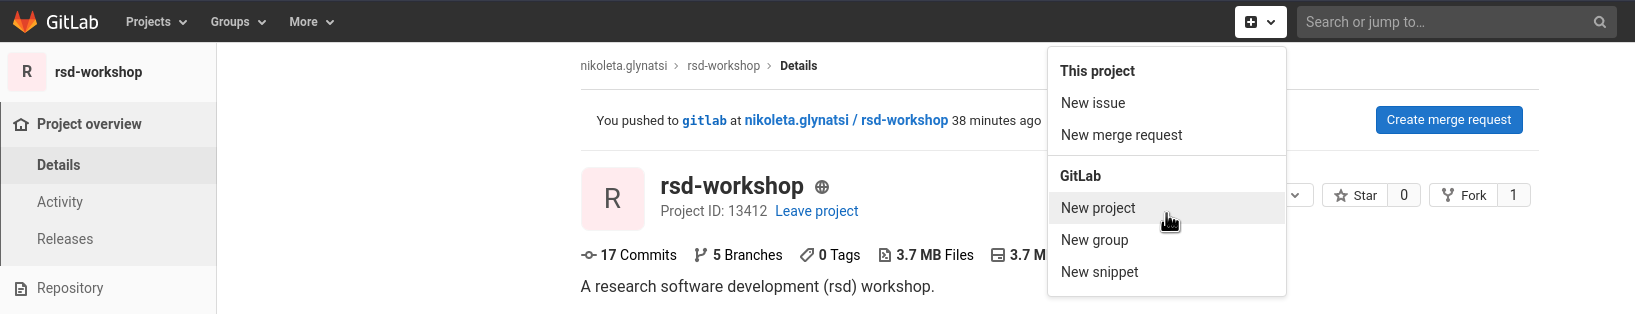

Here we are going to create the project's repository.

- **Repository name**: distances (this will automatically fill in the project slug, the last part of the repository URL.
- **Description**: A python package for calculating various distance measures.
- **Public**. We are going to create a public repository, so outsiders can use and contribute to our amazing code.
- **Initialize repository with a README**. GitLab allows us to initialize a repository with a README file. A README file contains information about other files in a directory or archive of computer software.

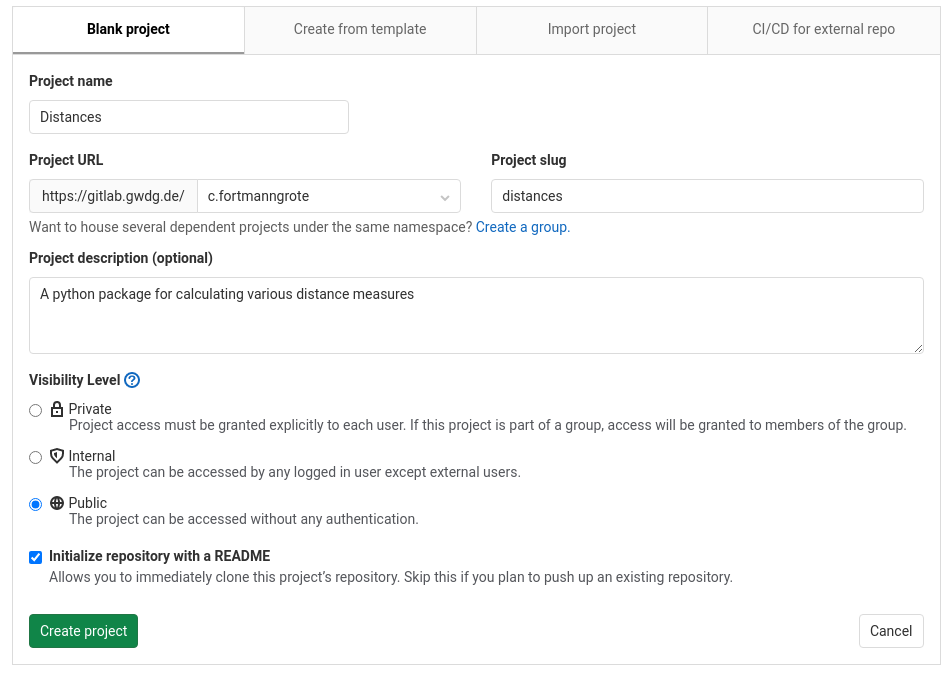

We click `Create project` to finalize the creation of our repository.

After a while, we will be redirected to the front page of our new repository, looking somewhat like this:

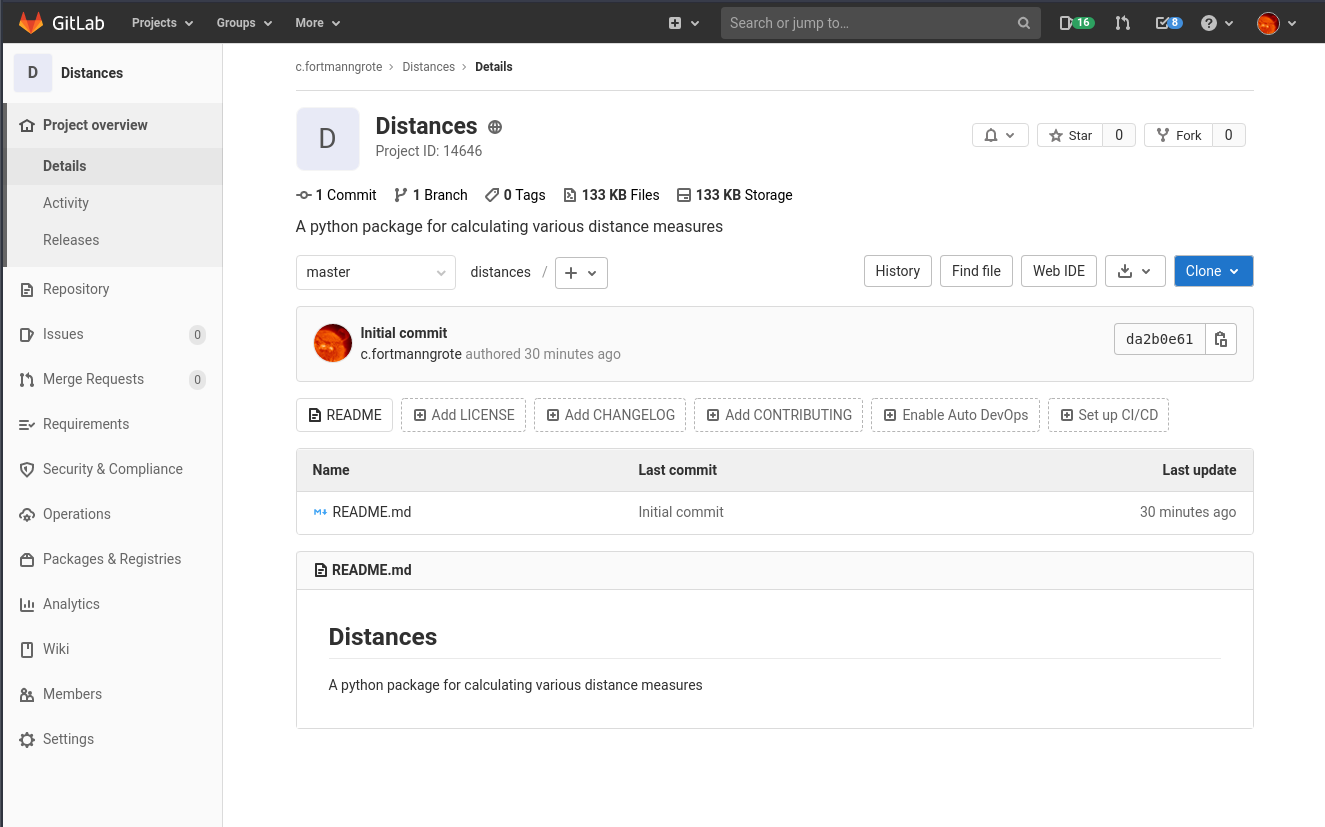

To complete the setup, we will add a license file. Click on `Add LICENSE`. Since this is a public repository, we will add an Open Source License. Here, we choose the MIT License. Click on `Apply a template` and type "MIT" into the search field. Then click on "MIT License". 

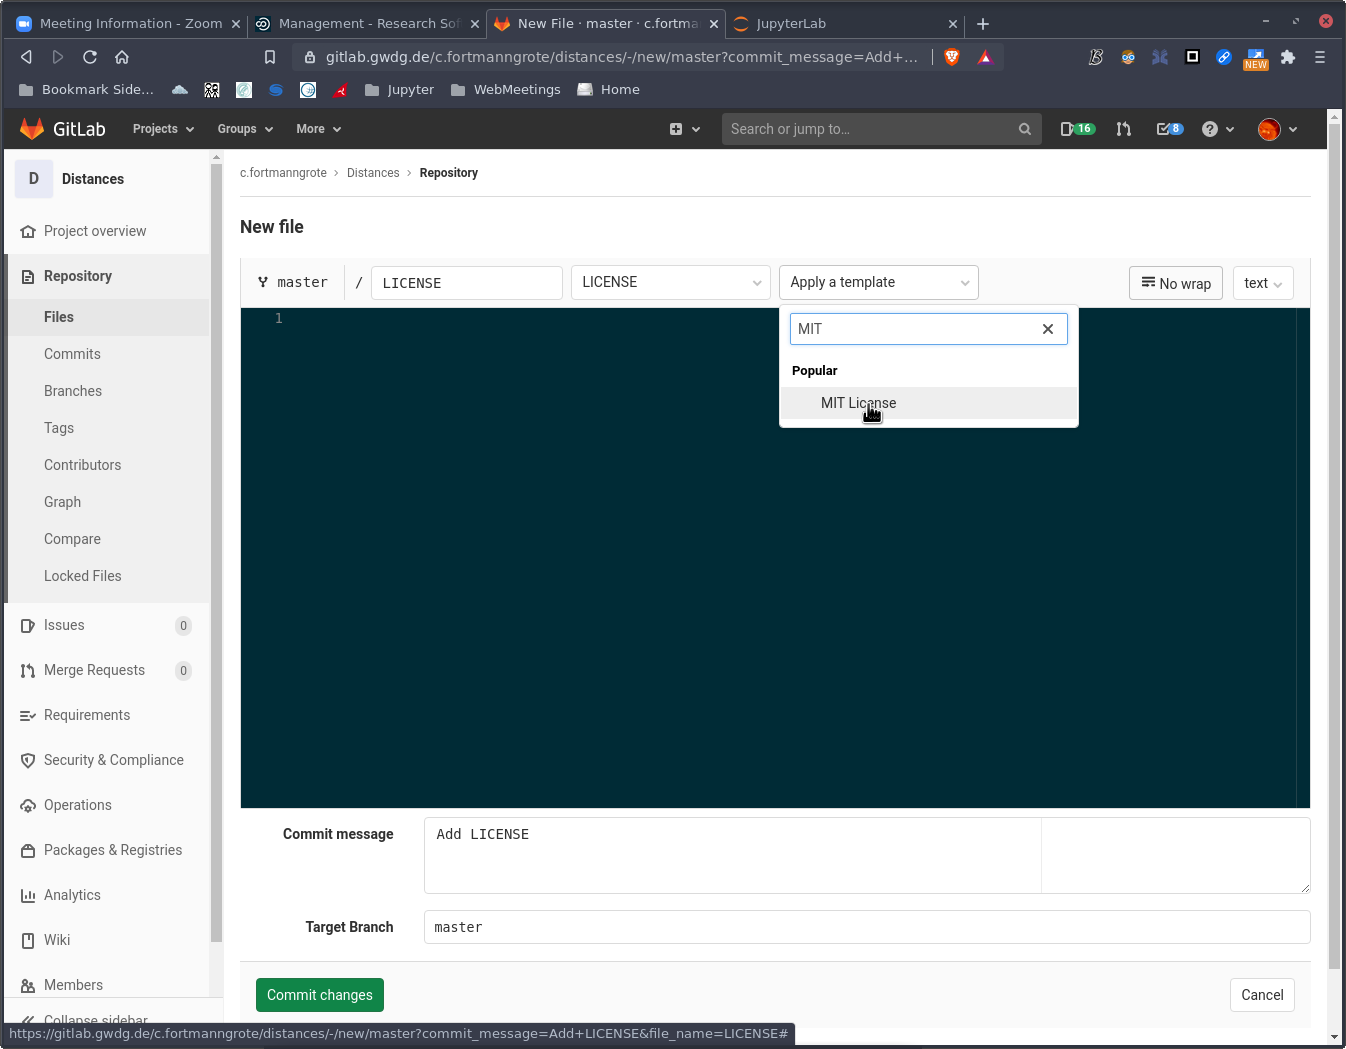

Finally click on `Commit changes`. Congratulations! You have just pushed your first commit to
the repository.

# Forking an existing repository
Often we do not start a project from scratch but rather we wish to contribute to or modify an existing project. The repository owner may not want to grant us access to her repo but we can still create a **fork**. A fork is an identical copy of the repo just under our own gitlab/github account. Be mindful to only ever fork projects that are either your own or that are licensed with a proper Open Source License.

In this example, we will fork the repository
https://gitlab.gwdg.de/mpievolbio-scicomp/sequenceio.git

Open the website of that project and then click the "Fork" button.

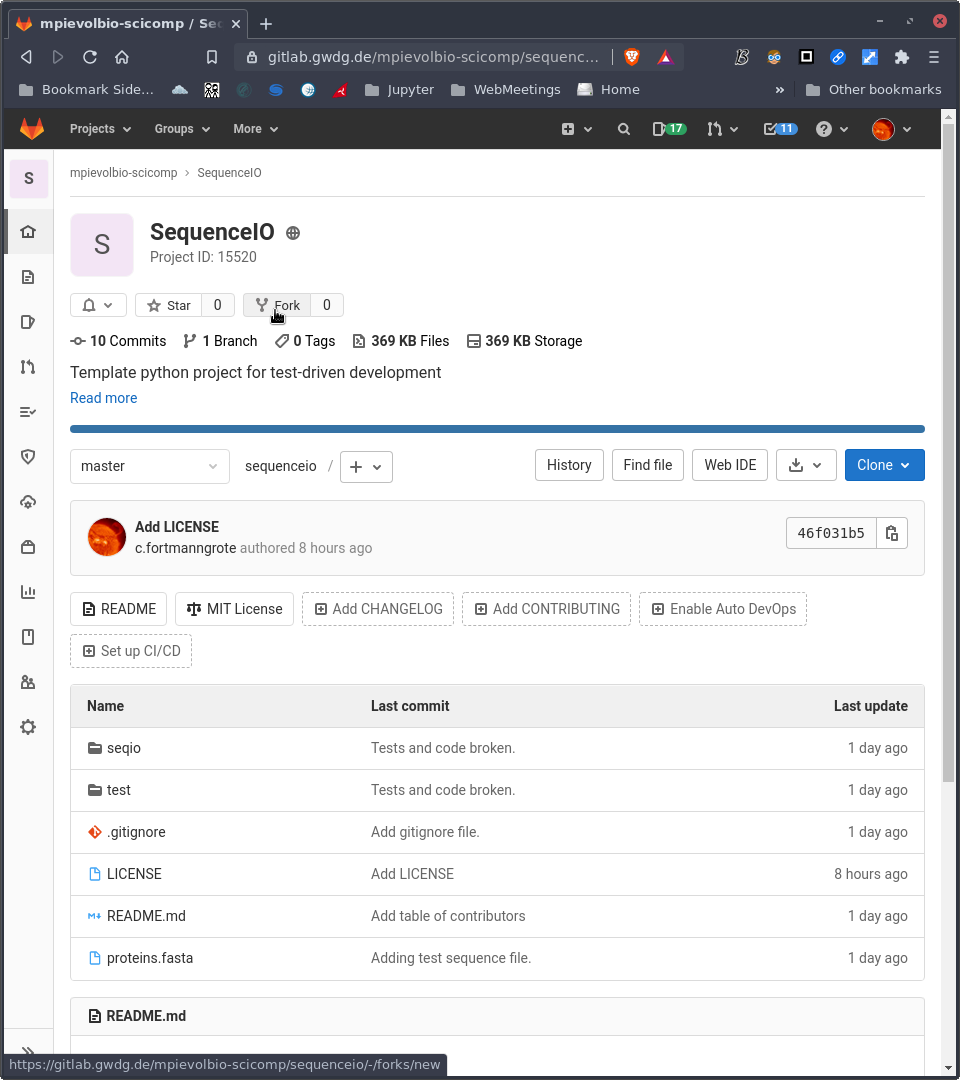

Select the namespace under which you want to host the forked repo. After a while you will be redirected to the homepage of the forked repo.

From here on, you can follow same workflow as if you created the repository from scratch.

# Clone the repository

When we create a repository on GitLab, the new project exists as a *remote* repository. It serves as the central *hub* where all changes to the code base
will be collected and where prospective users go to download the code. While GitLab allows you to edit the code online, developers typically work on a local copy (i.e. on their laptop/desktop computer) of the repository (a *clone*) and synchronize changes between the local repo (or multiple local copies on different computers)
and the remote repo using `git`.

To clone a GitLab repository we need to copy its address. On the front page of your newly created repo, click on `Clone` and then on the `Copy` icon next
to the **first** web address, the one starting with "git". 

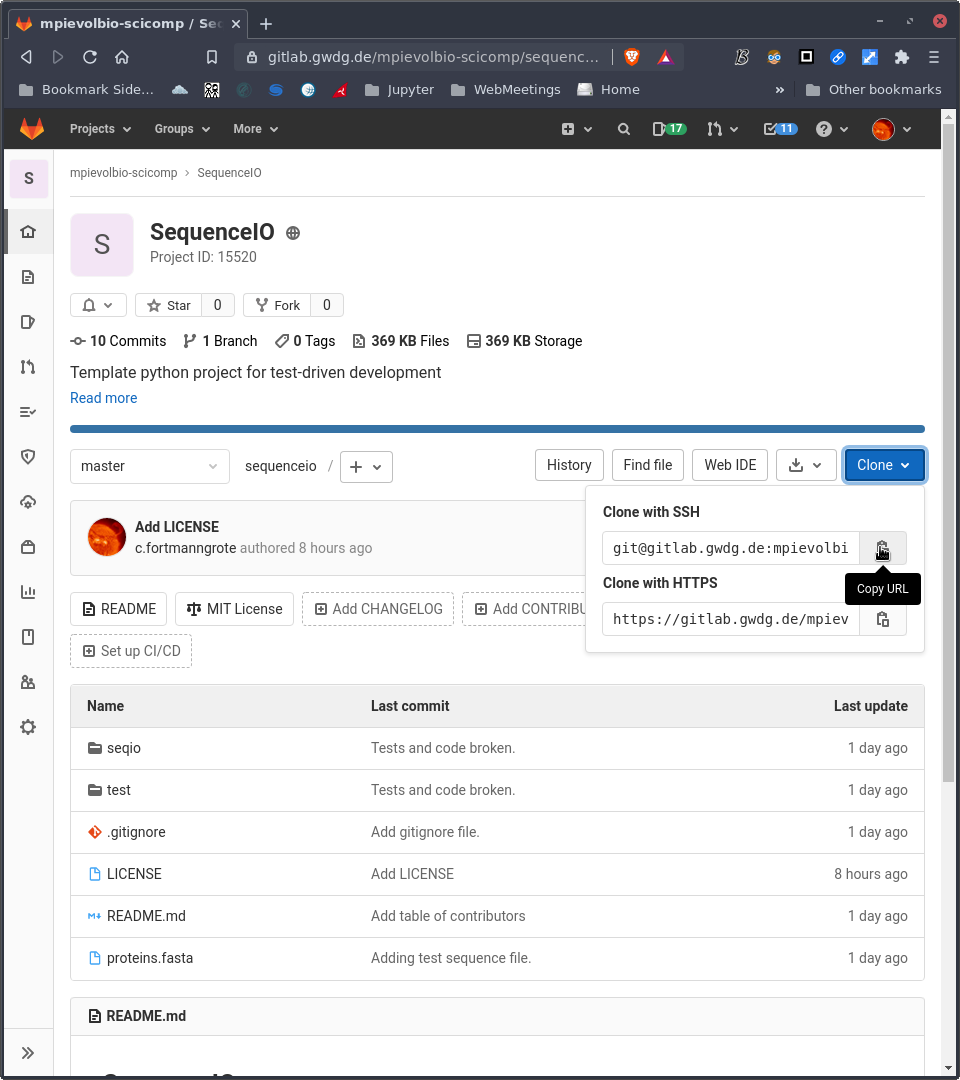

Then run the following command in a terminal/command prompt:
    
```shell
$ git clone <the_address_we_just_copied>
```
**Hint**: On most terminals you can right-click and paste the copied text into the command line.

The `git clone` command will create  the project directory right under your current working directory and populate it with all tracked files from the remote repo. You will also find the _.git/_ directory, where all files are stored that git needs to do its work.

    
```shell
$ cd Desktop
$ git clone git@gitlab.gwdg.de:<GITLAB_USERNAME>/<PROJECT_SLUG>.git
```

Now it's time to start developing. First, change into the repository's directory:

```shell
$ cd <PROJECT_DIR>
```

Before we start implementing our package, we will add one more configuration file to our repository, the `.gitignore` file. This file lists all files and filename patterns that we do **not** want to be monitored by git. For example, we may not want to include files generated when running our code. Running python code typically results in the creation of various "compiled" files with extensions like .pyc or .pyo (depending on the operating system). To exclude such files from being monitored by git, we run the following command:

```shell
$ echo "*.pyc" > .gitignore
$ echo "*.pyo" >> .gitignore
```
**Q:** What's the meaning of ">" and ">>" in above commands? Why not using ">"  again in the second command?

This creates the `.gitignore` file in the repository root directory. 

To put the `.gitignore` file under version control, we add and commit it to our repo:
```shell
$ git add .gitignore
$ git commit .gitignore -m "Add gitignore file."
```

# Making changes
The freshly cloned repository has a table in the 
README.md file that lists all contributors. Let's add our name and email to this list.

Add and commit the change and the push the changes to the remote.

```shell
git add README.md
git commit
git push 
```

Remember that the remote is the **forked** repository, not the original repo. We will now merge our changes from the fork into the original repo using _Merge Request_.

Locate and click the Merge Request button
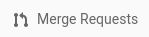
in the left panel. Click "New merge request" on the next page.

Next, you will be asked to select the source and target branch. The source branch is the branch on your fork that carries the changes. The target branch is on the original repository. It can be the master branch or a dedicated branch. Consult the project documentation if in doubt or contact the project owner.

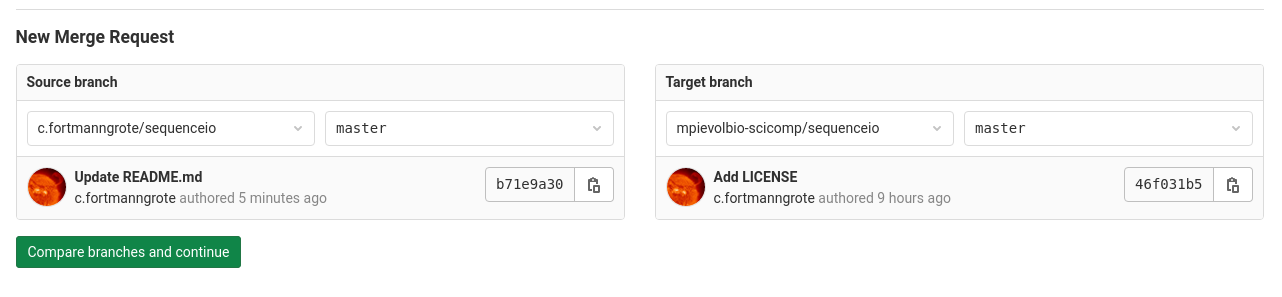

Click "Compare branches and continue". 

On the following page, give as much information as possible. Describe the goal and implementation details of the changes. Assign a reviewer and select project milestones and/or labels. All this will help the owner of the original repo to assess the value of your changes and foresee the consequences for other parts of the project. Finally click "Submit merge request".

The original repo owner will now be notified about the new merge request. She can review your code, test everything and provide feedback through the merge request form. If requested, you may have to alter your changes. In that case, you would make the review changes in your local repo and push to your fork. The pending merge request will automatically updated, you don't have to create a new merge request.

Finally, the original repo owner can accept (or decline) the merge request and the changes will then be integrated into the original repo.

# Branches

A freshly created project has only one branch, `master`. It is good practise to not work on the master branch directly. This way, we can make sure that the tip of the master branch always reflects the last stable (i.e. tested) point in the history of the code.
Instead we create different branches for working on different parts of a project.

So let's create a branch called `implement-distances-package`.

```shell
$ git branch implement-distances-package
$ git checkout implement-distances-package
```

The repository's structure right now is as follows:

```
|--- .gitingore
|--- LICENSE   
|--- README.md
```


Spend some time now to familiarize yourself with the structure and the current files of the repository.

**Qs:** 
   - List all files (including hidden files).
   - Look at the commit history (log).
   - What is the current status of your repo?
   - Which branches exist?
   - Which branch is checked out?
   - List the content of the hidden directory `.git`.



# Implement the distance function

We are now ready to write a package that calculates distances.

**1.** Inside our repository root directory, we will create a(nother) folder called `distances`. This can be done with the command:

```shell
$ mkdir distances
```

**2.** In the folder we just created we are going to add a file called `euclidean.py`. This file will contain the code needed to calculate the euclidean distance of two vectors.

Alter the file `euclidean.py` to contain the following lines of code:


```python
import math 

def euclidean_distance(u, v):
    """
    Computes the Euclidean distance between two vectors `u` and `v`.

    The Euclidean distance between `u` and `v`, is defined as:

    \sqrt{(u_1 - v_1) ^ 2 + ... + (u_n - v_n) ^ 2}

    Parameters
    ----------
    u : list
        Input vector.
    v : list
        Input vector.

    Returns
    -------
    euclidean : double
        The Euclidean distance between vectors `u` and `v`.
    """
    distance = 0
    
    for u_i, v_i in zip(u, v):
        distance += (u_i - v_i) ** 2
        
    return math.sqrt(distance)
```

**3.** Now that the function is implemented we need to commit the change. 

It is always good practice, to check the status of your repo before making any changes. 

**Q:** Confirm that the new file is currently untracked.

Now add it to the repo:
```shell
$ git add distances/euclidean.py
$ git commit
```

You can use the following commit message:

```
implement euclidean distance
```

The structure of the repository should now be the following:
    
```
|--- distances
    |--- euclidean.py
|--- .gitingore
|--- LICENSE   
|--- README.md
```

# Test the function

Now that we have written the function it is time to use it. Creating a test for an implemented function is a great way to:

1. Demonstrate it's usage
2. Test it's implementation

Let's create a file `test_euclidean.py` at the root of the repository such as the structure now is:

```
|--- distances
    |--- euclidean.py
|--- .gitingore
|--- LICENSE   
|--- README.md
|--- test_euclidean.py
```

Open `test_euclidean.py` with your editor and alter it so that it looks like:

```python
import distances

u = (2, -1)
v = (-2, 2)

print(distances.euclidean_distance(u, v))
```

Trying to run this file using the command:

```
$ python test_euclidean.py
```

should return the following error:

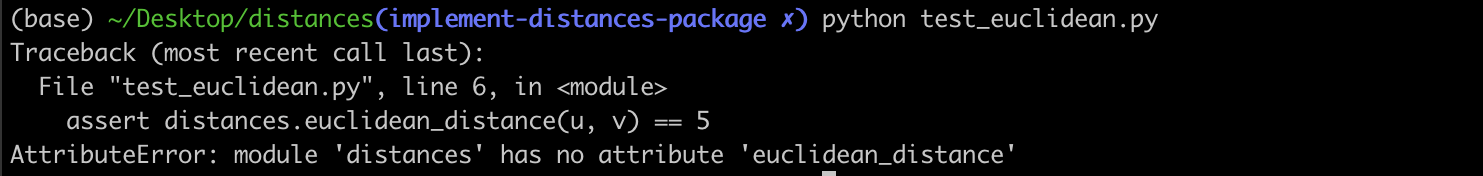

In order to let python know that files under the module `distances` we need to creat a file called `__init__.py` which will be under `distances` and will include the following line:

```python 
# distances/__init__.py

from .euclidean import euclidean_distance
```

Your directory should have these files now:  
```
|--- distances
    |--- __init__.py
    |--- euclidean.py
|--- .gitingore
|--- LICENSE   
|--- README.md
|--- test_euclidean.py
```

Now run the command: 

```
$ python test_euclidean.py
```

again.

Now let's alter the code to include an `assert` command:

```python
import distances

u = (2, -1)
v = (-2, 2)

assert distances.euclidean_distance(u, v) == 5
```

and run `python test_euclidean.py`.


Fantastic. Now, let's commit this change:

```shell
$ git add test_euclidean.py
$ git add distances/__init__.py
```

with the following commit:

```shell
add test for the euclidean distance
```

# Pytest

Currently the command:

```shell
$ python test_euclidean.py
```

does not give any feedback. In our case that is because the `assert` command is `True` and thus there is nothing to report.

Several packages already exist that can make tests output more useful. An example of such a Python package is `pytest`. `pytest` has been installed on your computers with Anaconda.


Alter the code in `test_euclidean.py` to:
    
```python
import distances

def test_euclidean():
    u = (2, -1)
    v = (-2, 2)

    assert distances.euclidean_distance(u, v) == 5
```

and now use the following command to run the tests:

```shell
$ pytest test_euclidean.py
```

This should return something like:

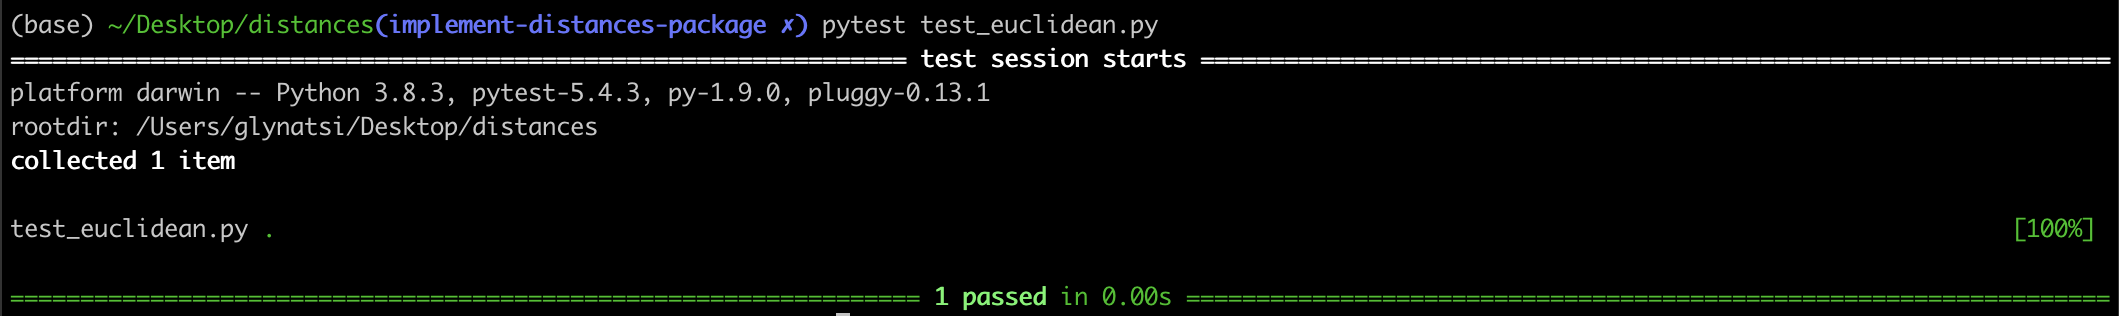

Now commit the changes with a message: `use the library pytest to run tests`.

The commands are:

```
$ git add test_euclidean.py
$ git commit
```
  

# Document the package

When you are developing a software package, you want to make available for other people to use. Thus, you need to document your project.

This include, letting people know how to install your project, its purpose and functionality, its license and how to test it. 

All these details can be included on a projects `README.md`.

The current `README.md` of our project looks like this:


> # distances
> A package for calculating different distance measures.

Alter the file to include details of your project.


An example of a `README.md`:


> # distances
> A package for calculating different distance measures.
> # Installation
> The project can be cloned locally using the following command:

> ```shell
> $ git clone <path>
> ```

> # Usage
> 
> Currently the following distance measures are implemented in the package:
> - Euclidean distance.
> # Tests
> 
> The package is being tested using `pytest`. To run the test suite use the
> command:
> ```shell
> $ pytest test_euclidean
> ```
> # License
> The package is under the MIT license.


**Once you are done altering the `README.md` remember to commit your changes.**

# Open a merge request

Our project is now ready. We have implemented a package that can calculate the euclidean distance and we want to share it with the world.

Before we update our copy on GitLab, run the command:

```shell
$ git status
```

We can see that there are a few files that have not been committed. These are
temporary files created by the python interpreter. As a developer, we never touch these files. Indeed, they are overwritten each time the original python source file changes. Hence, it makes sense to not track them in git and to add them to the list of ignored files. 

## Exercise: 
1. Add the directory `__pycache__/` in every subdirectory of your project to `.gitignore`. Commit the changes in `.gitignore`.

## Solution:
1.
```shell
$ echo "**/__pycache__/" >> .gitignore
$ git add .gitignore
$ git commit
```

So our `.gitingore` should include the lines:

```shell
__pycache__/
distances/__pycache__/
```

Add the changes, commit and run `git status` again.

Now that everything has been committed we are ready to update the copy of our project on GitHub.

To do that you need to run the following command:
    
```shell
$ git push -u origin implement-distances-package
```

and then you should something like this:


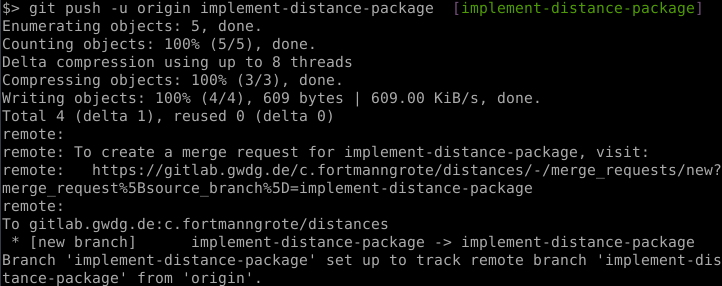

Once you have run the command open your repository on GitLab.

There you should see the following on the top of your page:

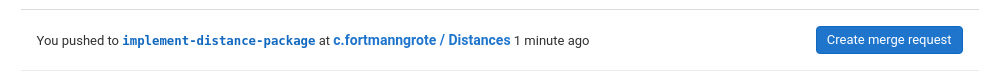

Click on `Create merge request`.

GitLab then transfers you to the `Merge request` page. Here you can review the changes you have made and `request` for your code to become part of the projects main branch.

Take sometime to familiarize yourself with the `Merge request` page and then click on `Submit merge request`.

The page will then refresh and you can again review the changes. Once all issues (if any) are resolved, you can finally accept the merge request by clicking the `Merge` button. All changes from the `implement-distances-package` branch will then be incorporated into the master branch. Optionally, the old branch is deleted.

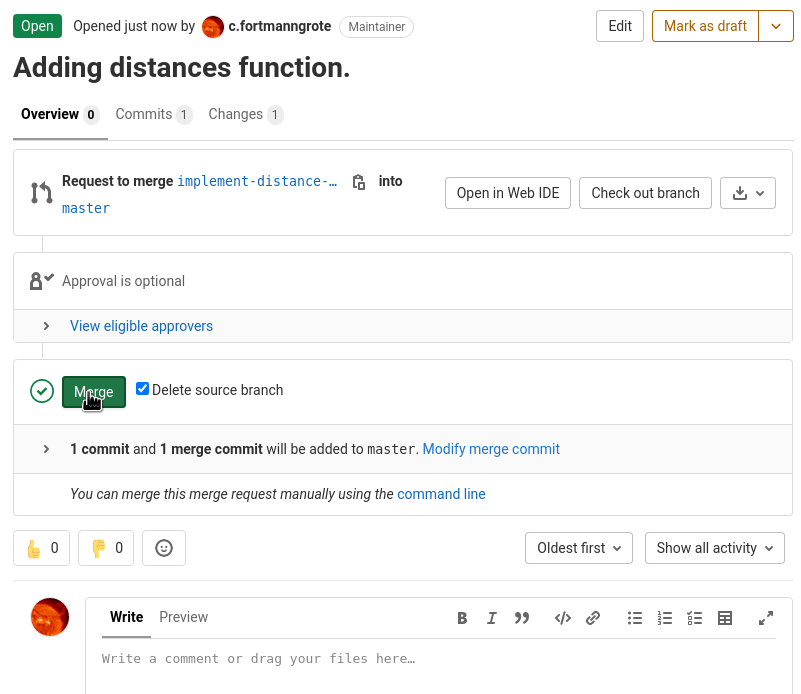

Congratulations you have created and merged your first merge request!

**NOTE**: On github, the corresponding functionality is called "Pull request".
